# K Nearest Neighbor - IRIS Dataset
---
Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset using pandas
df = pd.read_csv('~/my_code/applied_ai_notebooks/datasets/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
# Analysing statistical data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We will load all column names except our target column(species)

In [6]:
features = list(df.columns[:-1])

In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Sepal length vs Sepal Width

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

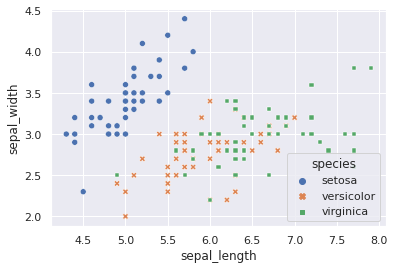

In [8]:
sns.set_theme()
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'] ,style=df['species'])

### Train test split

In [9]:
x = df.drop(['species'], axis='columns')
y = df.species

In [10]:
# for splitting data in two sets we will use train_test_split menthod
# import method from sklearn library
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
len(X_train)

120

In [13]:
len(X_test)

30

### KNN Classifier
import classifer from sklearn library, we can assume our k=9 for now

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
k_score = dict()

In [16]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [17]:
knn.score(X_test,y_test)

1.0

In [18]:
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(39.5, 0.5, 'Truth')

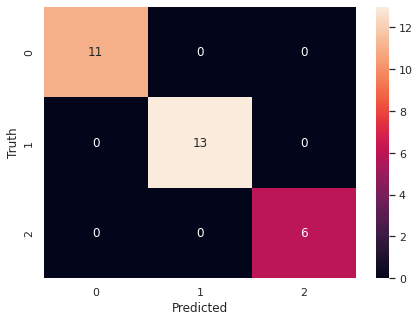

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

